# MA 792 Final Project
# Twitter Predictor
---
## YOUR_NAME_HERE
---
 * <a href="#starter">Starter Code</a>
 * <a href="#task1">Filter out unpopular tweets</a>
 * <a href="#task2">Calculate the sentiment of each tweet and plot</a>
 * <a href="#task3">For each week, calculate average stock price deltas</a>
 * <a href="#task4">For each week, calculate average tweet positivity</a>
 * <a href="#task5">Calculate correlation between tweet positivity and stock prices</a>


---
<a id='starter'></a>
## Starter Code
---

In [9]:
# download dependencies:
#   * 50,000 imdb movie reviews (80mb) https://ai.stanford.edu/~amaas/data/sentiment/
#   * glove embedding (130mb) https://nlp.stanford.edu/projects/glove/
#   * code for parsing the downloaded data
#   * pretrained neural network (160mb)
#   * tweets from elon musk
#   * tsla and doge stock data

!curl -L "https://raw.githubusercontent.com/pdabacus/ma792/main/download.sh" -o "download.sh"
!bash download.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5028  100  5028    0     0   125k      0 --:--:-- --:--:-- --:--:--  125k
using downloaded dataset downloads/imdb.tar.gz
extracting imdb dataset to aclImdb/
removing unneeded train/unsup directory
Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

288M	imdb

################

using downloaded model downloads/glove.6B.100d.txt.gz
ext

## Load Recurrent Neural Net

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json
import datetime
import torch

import glove
import rnn

glove_embedding = glove.GloVe("glove/glove.6B.100d.txt")
output_dim = 2

#instantiate the model
model = rnn.HappyAngryRNN(
    rnn.hyperparams["review_length"],
    glove_embedding,
    rnn.hyperparams["lstm_hiddin_dim"],
    rnn.hyperparams["lstm_layers"], 
    rnn.hyperparams["lstm_dropout"],
    output_dim
)

# load model weights
model.load_state_dict(torch.load("happy_angry_rnn.pt"))
model.eval()

building word embedding from glove/glove.6B.100d.txt
built embedding of 400000 word vectors each of length 100


HappyAngryRNN(
  (embedding): Embedding(400000, 100, padding_idx=0)
  (lstm): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
  (sig): Sigmoid()
)

## Use RNN to predict sentiment

In [8]:
# use model to make predictions
s = "i will fail this class. i dont know anything about python. this is terrible"
model.predict(s)

{'negative': 0.9515218138694763, 'positive': 0.04995137080550194}

## Load Tweets

In [16]:
with open("elon_tweets.json", "r") as f:
    tweets = json.load(f)

print("tweets loaded: %d" % len(tweets))


tweets loaded: 3249


In [14]:
t = tweets[-3]
print(t["author"])
print(t["id"])
print(t["created_at"])
print(t["full_text"])
print(t["favorites"])
print(t["retweets"])

elonmusk
1259159878427267000
2020-05-09 16:34:43
@GerberKawasaki @thirdrowtesla Tesla is filing a lawsuit against Alameda County immediately. The unelected &amp; ignorant “Interim Health Officer” of Alameda is acting contrary to the Governor, the President, our Constitutional freedoms &amp; just plain common sense!
24902
4043


In [15]:
model.predict(t["full_text"])

{'negative': 0.6506819128990173, 'positive': 0.36988040804862976}

## Load Stock Data

In [20]:
with open("tsla_doge_prices.json", "r") as f:
    stocks = json.load(f)

tickers = list(stocks.keys())
print("data loaded: %d prices for %s" % (stocks[tickers[0]]["n"], tickers))

data loaded: 248 prices for ['TSLA', 'X:DOGEUSD']


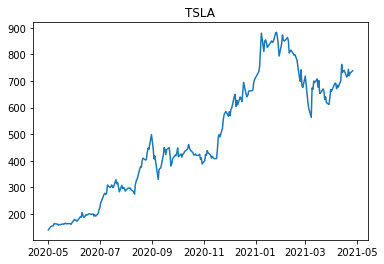

In [27]:
ticker = tickers[0]
n = stocks[ticker]["n"]
days = stocks[ticker]["times"]
prices = stocks[ticker]["prices"]

times = [datetime.datetime.strptime(t, "%Y-%m-%d %H:%M:%S") for t in days]

plt.plot(times, prices)
plt.title(ticker)
plt.show()

---
<a id='task1'></a>
## Filter out unpopular tweets
---

* create a histogram of the number of favorites and the number of retweets
* keep only the top 300 based on either retweets or favorites



number of tweets: 3249


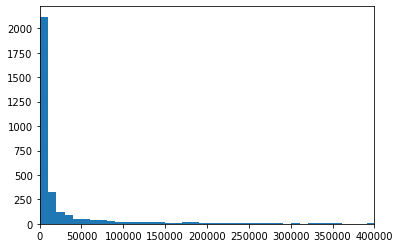

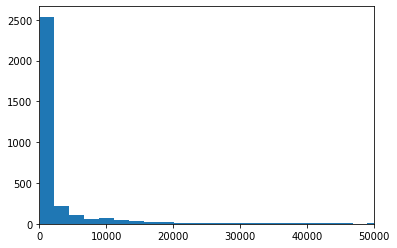

In [46]:
print("number of tweets:", len(tweets))

# to plot histograms use plt.hist()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

# plot the distribution of "favorites"
plt.hist()

# plot the distribution of "retweets"
plt.hist()


number of popular tweets: 352


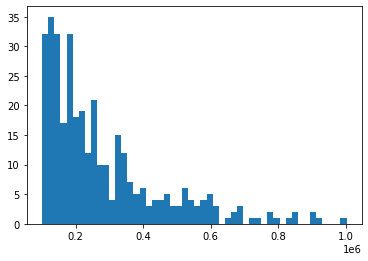

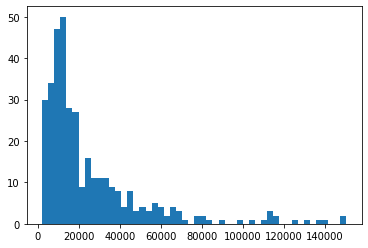

In [56]:
popular_tweets = list()

# filter out tweets using either the number of retweets or favorites
# so that the total number of tweets is 300






print("number of popular tweets:", len(popular_tweets))

# show histograms for the 300 popular tweets "number of favorites"
plt.hist()

# show histograms for the 300 popular tweets "retweets count"
plt.hist()

---
<a id='task2'></a>
## Calculate the sentiment of each tweet and plot
---

* plot the sentiment of the popular tweets over time using the RNN
* remove the tweets that are between -0.2 and 0.2 positivity
* print out 5 popular positive tweets and 5 popular negative tweets



In [116]:
sentiments = list()

# for each popular tweet, calculate the sentiment using model.predict(sentence)
# note: may take a few min to calculate




# you must convert the sentiment dictionary for each tweet to a float between -0.5 and 0.5
# ex: {"positive": 0.9, "negative": 0.1}    ->    0.4
# ex: {"positive": 0.3, "negative": 0.7}    ->   -0.2






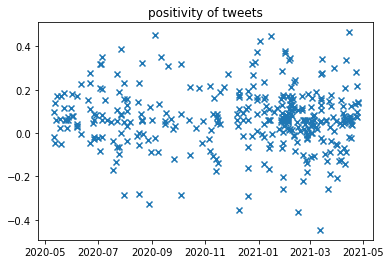

In [117]:
# plot the sentiments over time using plt.scatter()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html




plt.scatter()





In [118]:
extreme_tweets = list()
extreme_sentiments = list()

# remove the tweets that are between -0.1 and 0.1 positivity
# save those tweets and corresponding sentiments






print("number of extreme, popular tweets:", len(extreme_tweets))

number of extreme, popular tweets: 155


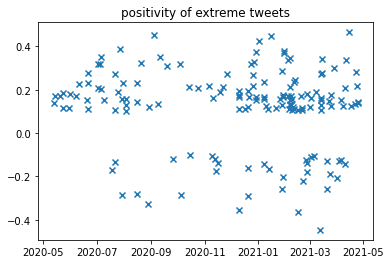

In [119]:
# replot the tweets
plt.scatter()

In [120]:
# print out 5 popular positive tweets and 5 popular negative tweets














    

positive tweets:
########################################
2021-04-24 08:55:19
define … beauty
########################################
2021-04-22 20:57:44
🌍🌎🌏 Happy Earth Day 🌍🌎🌏
########################################
2021-04-14 21:57:08
Tesla AI/Autopilot engineering is awesome! Making excellent progress solving real-world AI.
########################################
2021-04-11 12:23:49
The art In Cyberpunk is incredible
########################################
2021-04-09 22:24:01
It’s all about the cufflinks https://t.co/elccqC0Zuf
########################################




negative tweets:
########################################
2021-04-01 10:25:23
SpaceX is going to put a literal Dogecoin on the literal moon
########################################
2021-03-21 05:31:31
@cleantechnica I am accumulating resources to help make life multiplanetary &amp; extend the light of consciousness to the stars
########################################
2021-03-12 18:58:22
BTC (Bitcoin) is an an

---
<a id='task3'></a>
## For each fortnight (14 days), calculate average stock price deltas
---

* calculate the average stock price during 2 week intervals and plot
* calculate the average percent change of these prices between intervals



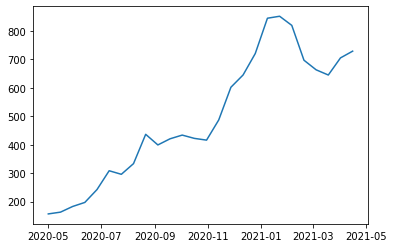

In [105]:
ticker = 
times = stocks[ticker]["times"]
prices = stocks[ticker]["prices"]

dt = datetime.timedelta(days=14)
t = times[0]

# for the chosen ticker, calculate the average price for 14 day periods






# plot







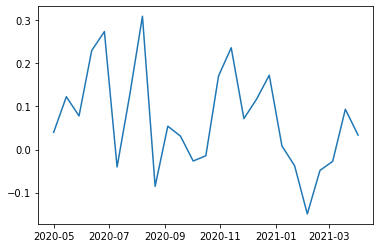

In [114]:
price_deltas = list()

# calculate the percent change between time periods
# delta_j = [y_(j+1) - y_j] / y_j






# plot the derivative

---
<a id='task4'></a>
## For each fortnight (14 days), calculate average tweet positivity
---

* calculate the average tweet positivity during 2 week intervals and plot



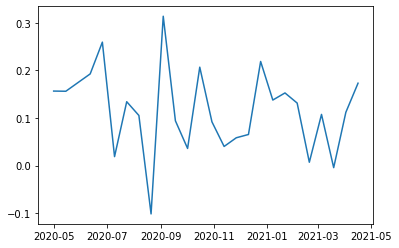

In [122]:
# similar to with the stock price, calculate the average positivity
# use the exact same time periods as used the stocks






# plot the average positivity per fortnite over time








---
<a id='task5'></a>
## Calculate correlation between tweet positivity and stock prices deltas
---

* calculate the correlation coefficient and find the best fit line
$$
\begin{align*}
  \hat y &= \beta_0 + \beta_1 x \\\\
  \mu_x &= \frac{1}{n} \sum_j x_j \\
  \mu_y &= \frac{1}{n} \sum_j y_j \\
  \sigma_x^2 &= \left( \frac{1}{n} \sum_j x_j^2 \right) - \mu_x^2 \\
  \sigma_y^2 &= \left( \frac{1}{n} \sum_j x_j^2 \right) - \mu_x^2 \\
  \tau &= \left( \frac{1}{n} \sum_j x_j y_j \right) - \mu_x \mu_y \\\\
  \beta_1 &= \frac{\tau}{\sigma_x^2} \\
  \beta_0 &= \mu_y - \beta_1 \mu_x \\\\
  r &= \frac{\tau}{\sqrt{\sigma_x^2 \cdot \sigma_y^2}}
\end{align*}
$$
* plot stock price deltas vs tweet positivity

In [159]:
# x = biweekly averaged tweet positivity
# y = biweekly averaged stock price percent change


# calculate correlation coefficient and parameters for the best fit line








best fit line: y = (0.0232) + (0.4035)*x


correlation: r = 0.3132


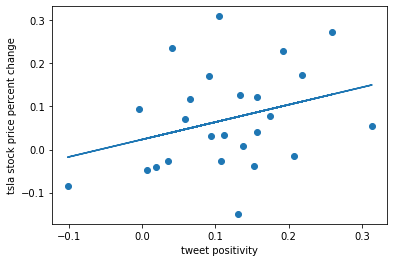

In [167]:
# make the scatter plot with the line on it






In [161]:
# note:        |r| < 0.4, no correlation
#        0.5 < |r| < 0.7: moderate correlation
#        0.8 < |r| < 1.0: strong correlation